In [1]:
import qcodes as qc
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import itertools as it

import detect_peaks
from importlib import reload
reload(detect_peaks )
from detect_peaks import *

from qcodes.data import hdf5_format
reload(hdf5_format)
h5fmt = hdf5_format.HDF5Format()

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

# data = qc.load_data('Fast transition tracking data/#009_fast_transition_tracking_DFR_14-22-23')
# # data = qc.load_data('Fast transition tracking data/#016_fast_transition_tracking_DFL_17-23-57')
# data.formatter = h5fmt
# data.read()
# data

DataSet:
   location = 'CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFL_set  | DFL          | (6,)
   Setpoint | DC_control_DFR_set  | DFR          | (6, 6)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (6, 6, 141)
   Setpoint | DC_control_TGAC_set | TGAC         | (6, 6, 141, 81)
   Measured | DC_voltage          | DC_voltage   | (6, 6, 141, 81)

In [25]:
DFL     = data.DC_control_DFL_set
DFR     = data.DC_control_DFR_set[1,:]      
DB      = data.DBL_DBR_set[1,1,:]           
TGAC    = data.DC_control_TGAC_set[1,1,1,:]
Z       = data.DC_voltage
Z       = np.swapaxes(Z,2,3)
Z1 = Z[4,:,:,:]
Z2 = Z[:,4,:,:]
#use 4,i and i,4

# for 4,2 top 2 and bottom 2
# for 4,3 top 2 best, then bottom 2, and middle one
# for 4,4 cut off top, then top 2, and bottom four
# for 4,5 its ok


# DB = data.DBL_DBR_set[1,1,:] #DBL_DBR
# TGAC = data.TGAC_set[1,0:87] #TGAC   
# DFR = data.DC_control_DFR_set[0:85]#DFR    
# Z = data.DC_voltage[0:85,0:87,:]
# Z0 = Z[40,:,:]

#Z[DFL,DFR,DB,TGAC]

{'Fast points': [0.625,
  0.61499999999999999,
  0.60999999999999999,
  0.59499999999999997],
 'Fit points': array([ 0.624     ,  0.61671429,  0.60942857,  0.59485714]),
 'Gradient vector': [-7.5000000000000062,
  -8.333333333333341,
  -8.333333333333341,
  -7.5000000000000062],
 'Slow points': array([ 0.58,  0.61,  0.64,  0.7 ]),
 'TG/fast gradient': -7.9166666666666732,
 'TG/slow gradient': 1086.6013071895215,
 'fast/slow gradient': -0.0072857142857144317,
 'slow intercept': 0.63128571428571456}

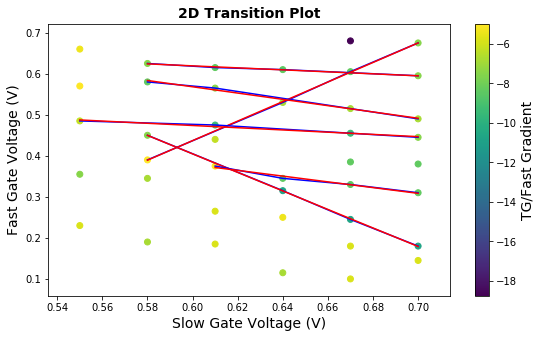

In [26]:
reload(detect_peaks )
from detect_peaks import *

Z = Z1
trans = find_transitions_2D(DFR,DB,TGAC,Z)
fit1 = track_transitions_multi(DFR,DB,TGAC,Z,trans)
plot_transitions_2D(DFR,DB,TGAC,Z,trans,fit1)
fit1[0]

{'Fast points': [0.65000000000000002,
  0.55000000000000004,
  0.51500000000000001,
  0.48499999999999999],
 'Fit points': array([ 0.64964286,  0.55      ,  0.51678571,  0.48357143]),
 'Gradient vector': [-9.3750000000000089,
  -7.5000000000000062,
  -6.8181818181818246,
  -10.714285714285722],
 'Slow points': array([ 0.55,  0.64,  0.67,  0.7 ]),
 'TG/fast gradient': -8.601866883116891,
 'TG/slow gradient': 258.98093841642265,
 'fast/slow gradient': -0.033214285714285696,
 'slow intercept': 0.64964285714285697}

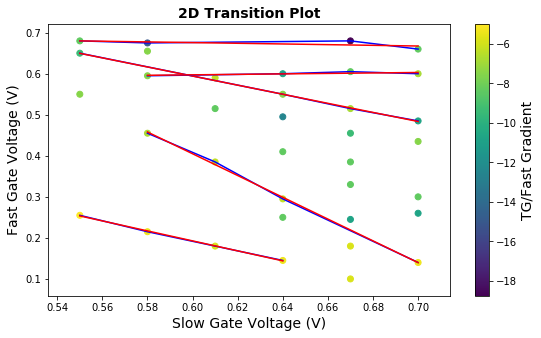

In [34]:
reload(detect_peaks )
from detect_peaks import *

Z = Z2
trans = find_transitions_2D(DFR,DB,TGAC,Z)
fit2 = track_transitions_multi(DFR,DB,TGAC,Z,trans)
plot_transitions_2D(DFR,DB,TGAC,Z,trans,fit2)
fit2[0]